In [4]:
%matplotlib inline

import math
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot  as plt

pd.set_option('display.float_format', '{:.2f}'.format)

In [5]:
df = pd.read_csv('train_transformed.csv', index_col='id')

In [6]:
#chequeo info general.
print("shape:", df.shape, "\n")
print("columns:", df.columns, "\n")
print(f"provincias: {df.provincia.unique()} \n")
print(f"tipodepropiedad: {df.tipodepropiedad.unique()}")

shape: (240000, 19) 

columns: Index(['tipodepropiedad', 'ciudad', 'provincia', 'antiguedad', 'habitaciones',
       'garages', 'banos', 'metroscubiertos', 'metrostotales', 'idzona', 'lat',
       'lng', 'fecha', 'gimnasio', 'usosmultiples', 'piscina',
       'escuelascercanas', 'centroscomercialescercanos', 'precio'],
      dtype='object') 

provincias: ['distrito federal' 'jalisco' 'edo. de méxico' 'oaxaca' 'quintana roo'
 'colima' 'san luis potosí' 'nuevo león' 'querétaro' 'tamaulipas' 'puebla'
 'yucatán' 'morelos' 'guerrero' 'tabasco' 'guanajuato' 'hidalgo'
 'veracruz' 'chihuahua' 'aguascalientes' 'sonora' 'michoacán'
 'baja california norte' 'baja california sur' 'coahuila' 'durango'
 'sinaloa' 'chiapas' 'nayarit' 'tlaxcala' 'campeche' 'zacatecas' nan] 

tipodepropiedad: ['apartamento' 'casa en condominio' 'casa' 'terreno' 'terreno comercial'
 'local comercial' 'quinta vacacional' 'oficina comercial' 'edificio'
 'casa uso de suelo' 'local en centro comercial' 'bodega comercial'
 '

<AxesSubplot:>

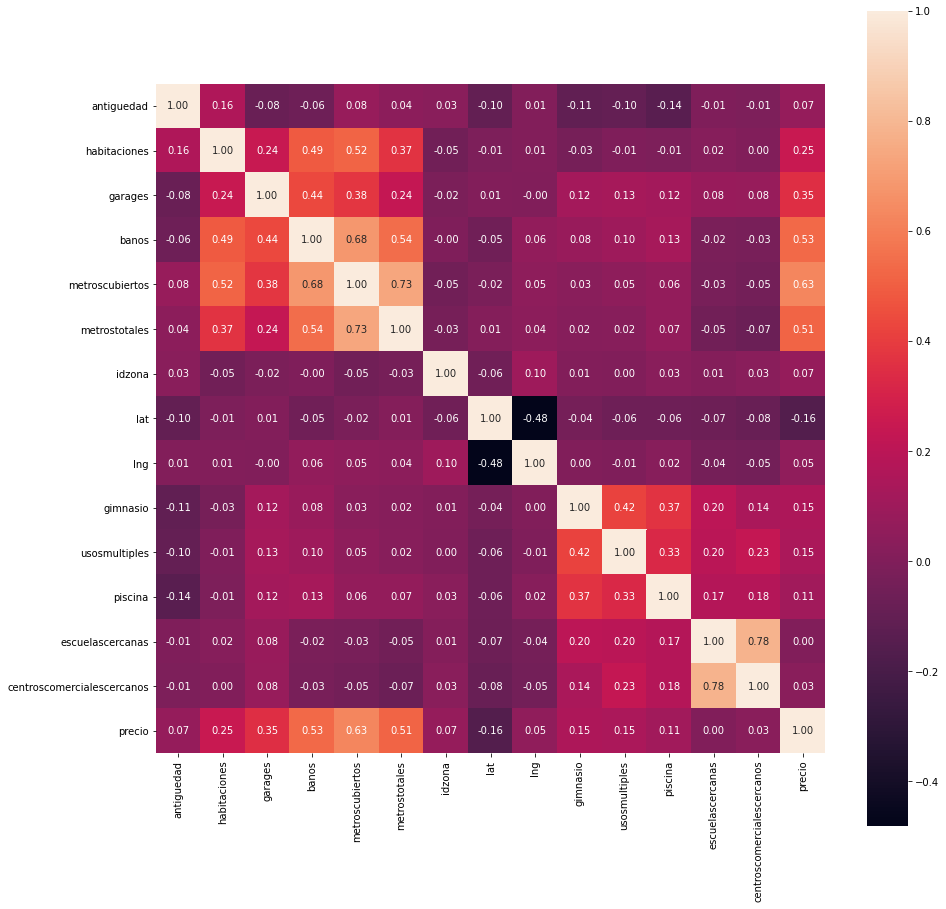

In [7]:
# Matriz de correlaciones como heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), square=True, annot=True, fmt='.2f')#,cmap='summer', center=0.5);

#ver variantes configuraciones de heatmap en https://seaborn.pydata.org/generated/seaborn.heatmap.html

#para elegir color de mapa se pasa el valor cmap -> https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html


In [8]:
# Del grafico se desprende que las siguientes grupos de features estan correlacionadas (esto no implica causalidad)
# A) habitaciones, garages, banos, metroscubiertos, metrostotales entre si.
# B) Las features de (A) con respecto a precio

In [9]:
# A continuacion realizo algunos graficos para entender un poco mejor los puntos A y B 
# mencionados anteriormente y dejo una descripcion de la interpretacion de estos. 

# Dejo asentado que es un analisis por arriba, no es su finalidad hacer una 
# presentacion final de estos.

In [10]:
df_corr = df.filter(['habitaciones', 'garages', 'banos', 'metroscubiertos', 'metrostotales'])

In [11]:
def get_column(A, j): 
    return A.iloc[:,j]

In [12]:
def scatter_matrix(df_corr, figsize):
    
    df_corr = df_corr.copy()
    df_corr = df_corr.dropna()
    df_corr = df_corr.sample(1000, random_state=1)
    columns = df_corr.columns.values

    _, num_columns = df_corr.shape
    fig, ax = plt.subplots(num_columns, num_columns, figsize = figsize) 

    for i in range(num_columns):
        for j in range(num_columns):

            # scatter column_j on the x-axis vs column_i on the y-axis
            if i != j: 
                ax[i][j].scatter(get_column(df_corr, j), get_column(df_corr, i), alpha=0.15, c='blue')
                
            # unless i == j, in which case show the series name
            else: ax[i][j].annotate("series " + str(i), (0.5, 0.5), 
                                    xycoords='axes fraction', 
                                    ha="center", va="center")

            ax[i][j].set_xlabel(columns[j], fontsize=14)
            ax[i][j].set_ylabel(columns[i], fontsize=14)
            
            # then hide axis labels except left and bottom charts
            if i < num_columns - 1: ax[i][j].xaxis.set_visible(False) 
            if j > 0: ax[i][j].yaxis.set_visible(False)

    # fix the bottom right and top left axis labels, which are wrong because
    # their charts only have text in them 
    ax[-1][-1].set_xlim(ax[0][-1].get_xlim()) 
    ax[0][0].set_ylim(ax[0][1].get_ylim())

    plt.show()

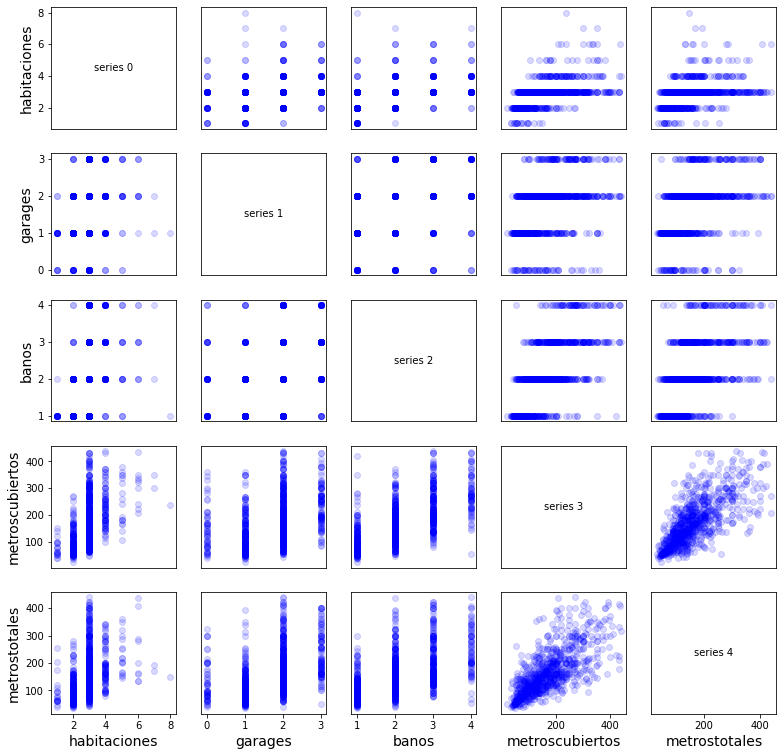

In [13]:
# Analizo (A) -> habitaciones, garages, banos, metroscubiertos, metrostotales entre si.
scatter_matrix(df_corr, figsize=(13,13))

In [14]:
# Analizo(A)

################

# 'habitaciones'

# con respecto a 'garages': 
# propiedades de 2 a 5 habitaciones tienen todo el espectro de garages.
# no hay propiedades de 5 a 8 habitaciones que no tengan garage.

# con respecto a 'banos'
# propiedades de 2 a 5 habitaciones tienen todo el espectro de banos.

# con respecto a 'metrostotales'
# propiedades de 4 a 5 piezas tienen gran variedad con respecto a metros cubiertos
# se visualiza una tendencia a mayor numero de habitaciones mayor metros cubiertos

# con respecto a 'metrostotales'
# propiedades de 4 a 5 piezas tienen gran variedad con respecto a metros totales
# se visualiza una tendencia a mayor numero de habitaciones mayor metros totales

################

# 'garages'

# con respecto a 'banos'
# se puede encontrar propiedades con 0 a 3 garages que tambien tienen de 1 a 4 banos

# con respecto a 'metrostotales' 
# parece que hay una leve tendencia donde a propiedad con mayor metros totales, mayor cantidad de garages.

# con respecto a 'metroscubiertos' 
# parece que hay una leve tendencia donde a propiedad con mayor metros cubiertos, mayor cantidad de garages.

################

# 'banos'
# con respecto a 'metrostotales' 
# parece que hay una leve tendencia donde a propiedad con mayor metros totales, mayor cantidad de banos.

# con respecto a 'metroscubiertos'
# parece que hay una leve tendencia donde a propiedad con mayor metros cubiertos, mayor cantidad de banos.

################

# 'metroscubiertos' con respecto a 'metrostotales'
# hay una tendencia fuerte donde a propiedad con mayor metros totales, mayor cantidad de metros cubiertos.



In [15]:
trainDF = df.sample(10000)
cor = trainDF[trainDF.columns[1:]].corr()
upper = cor.where(np.triu(np.ones(cor.shape), k=1).astype(np.bool))

#order the correlations and their associated column
minCorrValue = 0.05
goodCorrValue = 0.5

corrOrdered = list(upper['precio'].copy().sort_values())
numNan = upper['precio'].isnull().sum()
colOrdered = [upper.columns[list(upper['precio']).index(x)] for x in corrOrdered[:-numNan]]

# We have colOrdered, corrOrdered, numNan, lowCorrelatedColumns

lowCorrelatedColumns, highCorrelatedColumns = [], []

#get the high and low correlated columns + color
colorList= ['b']*len(colOrdered)#'b' == blue
for x in corrOrdered:
    if abs(x) in [x for x in list(upper['precio'].abs()) if x<minCorrValue]:
        colorList[corrOrdered.index(x)] = 'r'                    #undercoralated columns are red
        lowCorrelatedColumns.append(colOrdered[corrOrdered.index(x)])
    if abs(x) in [x for x in list(upper['precio'].abs()) if x>goodCorrValue]:
        colorList[corrOrdered.index(x)] = 'lime'                    #uppercoralated columns are lime
        highCorrelatedColumns.append(colOrdered[corrOrdered.index(x)])
                
print("colorList -> ", colorList)
print("lowCorrelatedColumns -> ", lowCorrelatedColumns)
print("highCorrelatedColumns -> ", highCorrelatedColumns)

colorList ->  ['b', 'r', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'lime', 'lime', 'lime']
lowCorrelatedColumns ->  ['escuelascercanas', 'centroscomercialescercanos']
highCorrelatedColumns ->  ['metrostotales', 'banos', 'metroscubiertos']


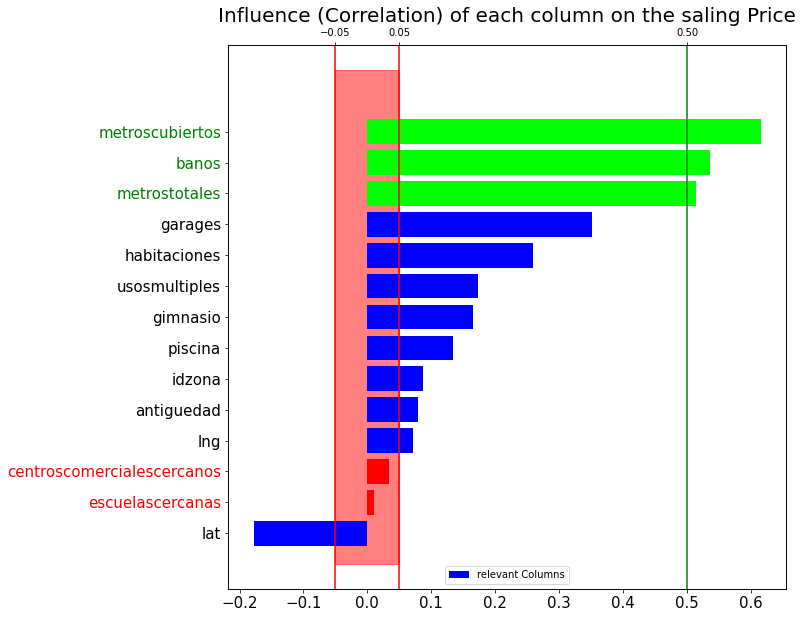

In [16]:
plt.figure(figsize=[10,10])
plt.barh(colOrdered,corrOrdered[:-numNan], color=colorList)

plt.title("Influence (Correlation) of each column on the saling Price", fontsize=20)
plt.tick_params(labelsize=15)
plt.legend(['relevant Columns'])

plt.axvline(x= minCorrValue, c='r')
plt.fill_between([-minCorrValue,minCorrValue], [len(upper),len(upper)],[-1,-1], alpha = 0.5, color = 'red')
plt.axvline(x= -minCorrValue, c='r')
plt.axvline(x= goodCorrValue, c='g')

ax = plt.gca()
ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks([-minCorrValue,minCorrValue,goodCorrValue])

#color the yticks
for x in lowCorrelatedColumns:
        ax.get_yticklabels()[colOrdered.index(x)].set_color("red")
for x in highCorrelatedColumns:
        ax.get_yticklabels()[colOrdered.index(x)].set_color("green")

plt.show()

In [17]:
def scatter_list(df_corr, fixed_column, figsize):
    _, num_columns = df_corr.shape
    fig, ax = plt.subplots(1, num_columns, figsize = figsize) 
    columns = df_corr.columns.values
    ax[0].set_ylabel(fixed_column.columns.values[0], fontsize=14)
    
    for i in range(num_columns):
        
        i_column = get_column(df_corr, i)
        aux = pd.DataFrame()
        aux['A'] = i_column
        aux['B'] = fixed_column
        aux.dropna()
        aux = aux.sample(1000, random_state=1)

        ax[i].scatter(aux['A'], aux['B'], alpha=0.15, c='blue')
        ax[i].xaxis.set_visible(True) 
        ax[i].yaxis.set_visible(True)
        ax[i].set_xlabel(columns[i], fontsize=14)

    plt.show()

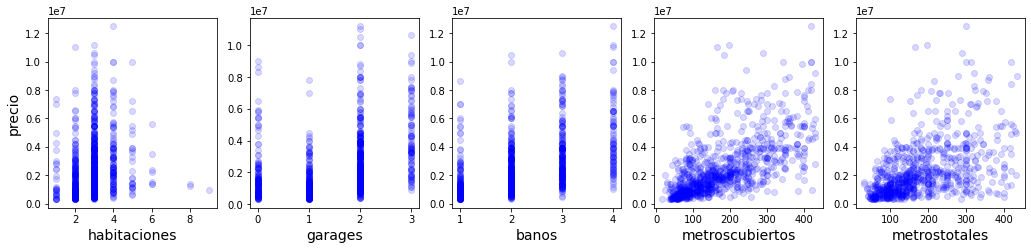

In [18]:
# Analizo (B) -> Las vars de (A) con precio
_, num_columns = df_corr.shape
fixed_column = df.filter(['precio'], axis=1)
scatter_list(df_corr, fixed_column, figsize=(3.5 * num_columns, 3.5))

In [ ]:
# precio

# con respecto a 'habitaciones':
# la mayor cantidad de publicaciones son de 2 a 4 habitaciones.
# hay pocas publicaciones de > 6 habitaciones y no son precios mas elevados que las publ. con habitaciones de 2 a 4.

# con respecto a 'garages': 
# pareciera poder encontrarse publ. con garages de 0 a 2 con precio similar.
# se encuentras solo algunos precios elevados para publ. con garages de 2 a 3

# con respecto a 'banos': 
# pareciera poder encontrarse publ. con banos de 1 a 4 con precio similar.
# pareciera que no hay muchos precios elevados con 1 baño.

# con respecto a 'metroscubiertos' y 'metrostotales': 
# se pueda observar la tendencia de que a mayor precio tenemos mas 'metroscubiertos' y 'metrostotales'